<h2><font color="#004D7F" size=6>Módulo 8. Aprendizaje No Supervisado</font></h2>



<h1><font color="#004D7F" size=5>8.1. Algoritmos ULAs</font></h1>

<br><br>
<div style="text-align: right">
<font color="#004D7F" size=3>Manuel Castillo-Cara</font><br>
<font color="#004D7F" size=3>Machine Learning con Python</font><br>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [1. Preliminares](#section1)
* [2. K-medias](#section2)
* [3. Jerarguico](#section3)
* [4. DBSCAM](#section4)




<a id="section1"></a>
# <font color="#004D7F"> 1. Preliminares</font>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # Colores

#### Primera base de datos: Iris

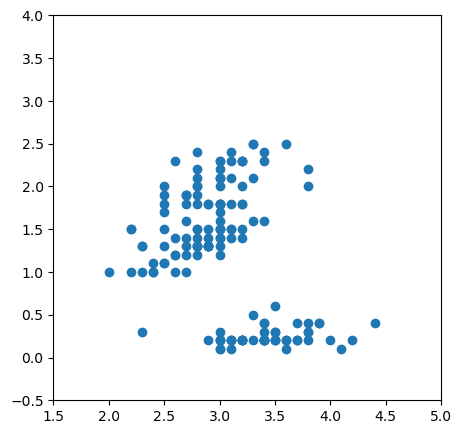

In [6]:
from sklearn import datasets
iris = datasets.load_iris()

# Solamente considera dos variables.
X_iris = iris.data[:,[1,3]]

# Dibuja los puntos. La figura mantiene las proporciones para que
# se aprecie mejor el comportamiento de los algoritmos.
plt.figure(figsize=(5,5))
plt.scatter(X_iris[:,0], X_iris[:,1])
plt.xlim(1.5,5)
plt.ylim(-0.5,4)
plt.show()

#### Segunda base de datos: círculos concéntricos

(-10.0, 10.0)

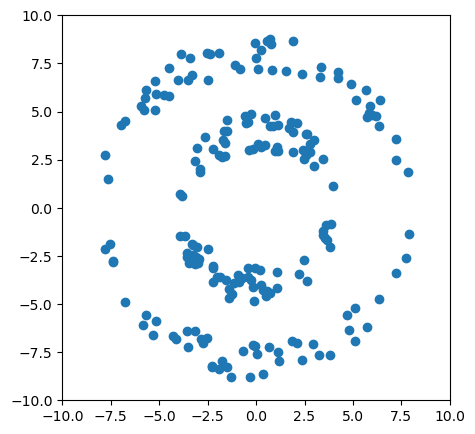

In [7]:
X_circ = np.zeros((200,2))

# Radio de la primera circunferencia
radio_1 = 8
# Genera números (eje x)
X_circ[:100,0] = np.random.rand(100)*radio_1*2 - radio_1
# Genera valores (eje y) con algo de ruido.
X_circ[:100,1] =  np.sqrt(radio_1**2-X_circ[:100,0]**2) + (2*np.random.rand(100)-1)
X_circ[:100,1] = X_circ[:100,1] * np.random.choice([-1,1],100)

# Radio de la segunda circunferencia
radio_2 = 4
# Genera números (eje x)
X_circ[100:,0] = np.random.rand(100)*radio_2*2 - radio_2
# Genera valores (eje y) con algo de ruido.
X_circ[100:,1] = np.sqrt(radio_2**2-X_circ[100:,0]**2) + (2*np.random.rand(100)-1)
X_circ[100:,1] =X_circ[100:,1] * np.random.choice([-1,1],100)

# Dibuja los puntos. La figura mantiene las proporciones para que
# se aprecie mejor el comportamiento de los algoritmos.
plt.figure(figsize=(5,5))
plt.scatter(X_circ[:,0],X_circ[:,1])
plt.xlim(-10,10)
plt.ylim(-10,10)


<a id="section2"></a>
# <font color="#004D7F"> 2. $k$-means</font>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> 
La Documentación oficial de [k-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
</div>

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


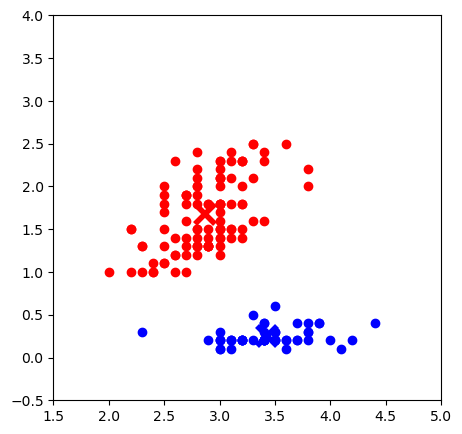

In [8]:
from sklearn.cluster import KMeans

# Ejecuta K-medias sobre los datos
K = 2
kmeans = KMeans(n_clusters=K)
kmeans.fit(X_iris)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Obtiene el cluster al que pertenece cada elemento
labels = kmeans.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
plt.xlim(1.5,5)
plt.ylim(-0.5,4)
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_iris[labels==label,0], X_iris[labels==label,1], c = colors[label])
    # Dibuja el centroide
    plt.plot(centroids[label,0], centroids[label,1], mew=4, c = colors[label], markersize=15, marker = 'x')
plt.show()

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


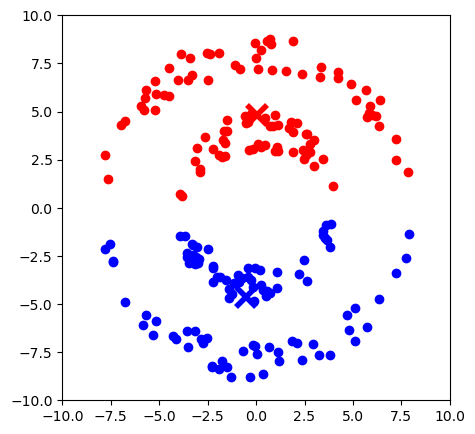

In [9]:
# Ejecuta K-medias sobre los datos
K = 2
kmeans = KMeans(n_clusters=K)
kmeans.fit(X_circ)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Obtiene el cluster al que pertenece cada elemento
labels = kmeans.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
plt.xlim(-10,10)
plt.ylim(-10,10)
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_circ[labels==label,0], X_circ[labels==label,1], c = colors[label])
    # Dibuja el centroide
    plt.plot(centroids[label,0], centroids[label,1], mew=4, c = colors[label], markersize=15, marker = 'x')
plt.show()

#### Ejemplo con 3 variables.

C:\Users\eel20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


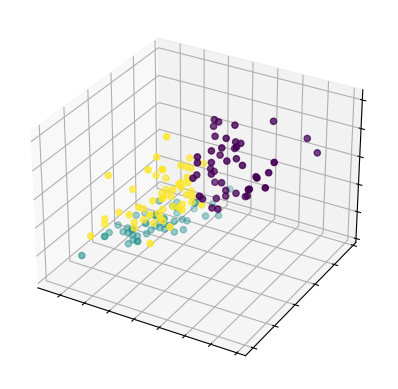

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Considera dos variables.
X_iris3D = iris.data[:, [0, 1, 3]]

# Ejecuta K-medias sobre los datos
K = 3
kmeans = KMeans(n_clusters=K, n_init=10)  # Explicitly set n_init to avoid the future warning
kmeans.fit(X_iris3D)

# Obtiene los centroides de los clusters
centroids = kmeans.cluster_centers_

# Obtiene el cluster al que pertenece cada elemento
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Use add_subplot instead of Axes3D

ax.scatter(X_iris3D[:, 0], X_iris3D[:, 1], X_iris3D[:, 2], c=labels.astype(float))

ax.xaxis.set_ticklabels([])  # Use xaxis instead of w_xaxis
ax.yaxis.set_ticklabels([])  # Use yaxis instead of w_yaxis
ax.zaxis.set_ticklabels([])  # Use zaxis instead of w_zaxis

plt.show()



<a id="section3"></a>
# <font color="#004D7F"> 3. Jerarquico</font>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> 
La Documentación oficial de [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)
</div>

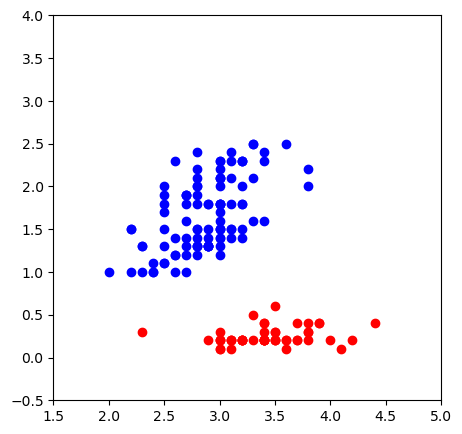

In [23]:
from sklearn.cluster import AgglomerativeClustering

# Ejecuta el clustering jerárquico sobre los datos
K = 2
#AC = AgglomerativeClustering(n_clusters=K, linkage='ward')
AC = AgglomerativeClustering(n_clusters=K, linkage='average')
#AC = AgglomerativeClustering(n_clusters=K, linkage='complete')
AC.fit(X_iris)

# Obtiene el cluster al que pertenece cada elemento
labels = AC.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
plt.xlim(1.5,5)
plt.ylim(-0.5,4)
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_iris[labels==label,0], X_iris[labels==label,1], c = colors[label])
plt.show()

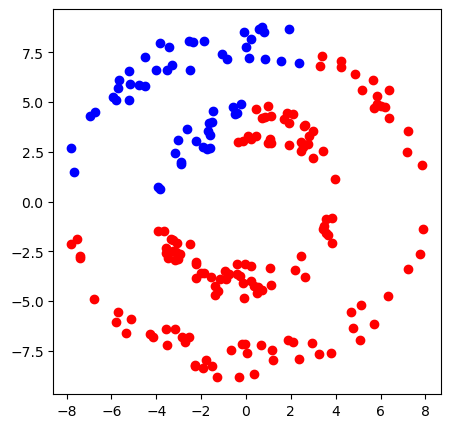

In [24]:
from sklearn.cluster import AgglomerativeClustering

# Ejecuta el clustering jerárquico sobre los datos
K = 2
AC = AgglomerativeClustering(n_clusters=K, linkage='complete')
AC.fit(X_circ)

# Obtiene el cluster al que pertenece cada elemento
labels = AC.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_circ[labels==label,0], X_circ[labels==label,1], c = colors[label])
plt.show()

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering

# Considera dos variables.
X_iris3D = iris.data[:,[0,1,3]]

K = 2
AC = AgglomerativeClustering(n_clusters=K, linkage='complete')
AC.fit(X_iris3D)

# Obtiene el cluster al que pertenece cada elemento
labels = AC.labels_

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_iris3D[:, 0], X_iris3D[:, 1], X_iris3D[:, 2], c=labels.astype(float))

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

<Figure size 640x480 with 0 Axes>


<a id="section4"></a>
# <font color="#004D7F"> 4. DBSCAN</font>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> 
La Documentación oficial de [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)
</div>

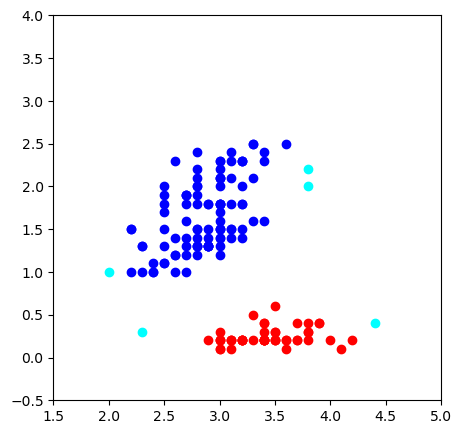

In [28]:
from sklearn.cluster import DBSCAN

# Ejecuta el clustering jerárquico sobre los datos
DBS = DBSCAN(eps=0.3, min_samples=10) # Vemos que detecta el ruido
#DBS = DBSCAN(eps=0.6, min_samples=10)
#DBS = DBSCAN(eps=0.2, min_samples=10)
DBS.fit(X_iris)

# Obtiene el cluster al que pertenece cada elemento
labels = DBS.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
plt.xlim(1.5,5)
plt.ylim(-0.5,4)
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_iris[labels==label,0], X_iris[labels==label,1], c = colors[label])

plt.show()
# Ya empieza a detectar ruido

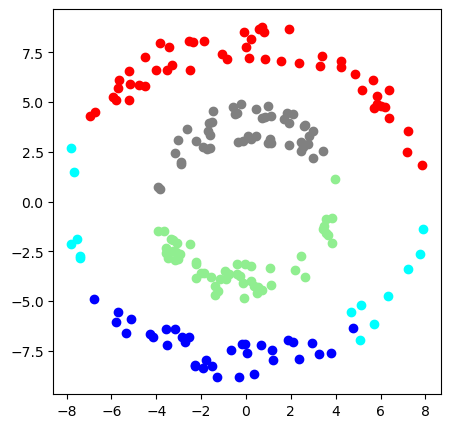

In [17]:
from sklearn.cluster import DBSCAN

# Ejecuta el clustering jerárquico sobre los datos
DBS = DBSCAN(eps=2, min_samples=8)
DBS.fit(X_circ)

# Obtiene el cluster al que pertenece cada elemento
labels = DBS.labels_

# Dibuja los clusters
plt.figure(figsize=(5,5))
# Para cada etiqueta (k etiquetas)
for label in np.unique(labels):
    # Dibuja los puntos con el color correspondiente
    plt.scatter(X_circ[labels==label,0], X_circ[labels==label,1], c = colors[label])
plt.show()

In [18]:
from mpl_toolkits.mplot3d import Axes3D

# Considera dos variables.
X_iris3D = iris.data[:,[0,1,3]]

# Ejecuta el clustering jerárquico sobre los datos
DBS = DBSCAN(eps=0.5, min_samples=5)
DBS.fit(X_iris3D)

# Obtiene el cluster al que pertenece cada elemento
labels = DBS.labels_

fig = plt.figure()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(X_iris3D[:, 0], X_iris3D[:, 1], X_iris3D[:, 2], c=labels.astype(np.float))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

<Figure size 640x480 with 0 Axes>

<div style="text-align: right">
<a href="#indice"><font size=5><i class="fa fa-arrow-circle-up" aria-hidden="true" style="color:#004D7F"></i></font></a>
</div>

---

<div style="text-align: right"> <font size=6><i class="fa fa-coffee" aria-hidden="true" style="color:#004D7F"></i> </font></div>